In [80]:
!pip install --upgrade opencv-python


In [81]:
!apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [82]:
# Installing pytesseract library required to do OCR for text extraction from images
!pip install pytesseract

In [83]:
!apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [84]:

# import cv2
# import pytesseract
# import pandas as pd
# from PIL import Image

# def ocr_to_dataframe(image_path):
#     # Load the image using OpenCV
#     img = cv2.imread(image_path)

#     # Perform OCR using Pytesseract
#     text = pytesseract.image_to_string(Image.fromarray(img))

#     # Split the text into lines
#     lines = text.strip().split('\n')

#     # Create a DataFrame to store the extracted text
#     df = pd.DataFrame({'Text': lines})

#     return df

# # Example usage:
# if __name__ == "__main__":
#     image_path = '/content/Images Dataset/images'  # Replace with the path to your image
#     df = ocr_to_dataframe(image_path)
#     print(df)




In [85]:
# import cv2
# import pytesseract
# import pandas as pd
# from PIL import Image
# import os

# def ocr_to_dataframe(image_paths):
#     ocr_results = []
#     for image_path in image_paths:
#         if not os.path.isfile(image_path):
#             print(f"Error: File '{image_path}' not found.")
#             continue

#         # Load the image using OpenCV
#         img = cv2.imread(image_path)

#         if img is None:
#             print(f"Error: Unable to read image '{image_path}'.")
#             continue

#         # Perform OCR using Pytesseract
#         text = pytesseract.image_to_string(Image.fromarray(img))

#         # Split the text into lines
#         lines = text.strip().split('\n')

#         # Store the OCR results in a DataFrame
#         for line in lines:
#             ocr_results.append({'Text': line, 'Image_Path': image_path})

#     df = pd.DataFrame(ocr_results)
#     return df

# # Function to get image file paths from a folder
# def get_image_paths_from_folder(folder_path):
#     image_paths = []
#     for filename in os.listdir(folder_path):
#         if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
#             image_paths.append(os.path.join(folder_path, filename))
#     return image_paths

# # Example usage:
# if __name__ == "__main__":
#     folder_path = '/content/drive/MyDrive/Colab Notebooks/Walmart Hackathon/images-dataset'  # Replace with the path to your image folder
#     image_paths = get_image_paths_from_folder(folder_path)

#     df = ocr_to_dataframe(image_paths)
#     if df is not None and not df.empty:
#         print(df)


In [86]:
!pip install pytesseract
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done

tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [87]:
import os
import cv2
import pytesseract
import pandas as pd
from sklearn.ensemble import IsolationForest
from google.colab import drive


In [88]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:

def extract_text_from_images(image_folder):
    text_data = []
    image_paths = []  # Store the image paths instead of just names

    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        img = cv2.imread(image_path,0)

        ret,thresh1 = cv2.threshold(img,210,255,cv2.THRESH_BINARY)
        blurred_image = cv2.GaussianBlur(img, (5, 5), 0)
        # gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and smooth the image
        # blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply adaptive thresholding to create a binary image
        threshold_image = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
        )

        text = pytesseract.image_to_string(threshold_image)

        # gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and smooth the image
        # blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply adaptive thresholding to create a binary image


        text_data.append(text)
        image_paths.append(image_path)  # Store the image paths

    return text_data, image_paths  # Return the image paths instead of names


In [90]:
# import os
# import cv2
# import pytesseract
# import pandas as pd
# import numpy as np
# from sklearn.svm import OneClassSVM
# from sklearn.feature_extraction.text import TfidfVectorizer
# def preprocess_text_data(text_data):
#     # Convert the text data to numerical features using TF-IDF vectorization
#     vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
#     numerical_features = vectorizer.fit_transform(text_data)
#     return numerical_features

# image_folder = '/content/drive/MyDrive/Colab Notebooks/Walmart Hackathon/images-dataset'

# # Extract text from images
# text_data, image_paths = extract_text_from_images(image_folder)

# # Create the DataFrame
# df = pd.DataFrame({'Image Path': image_paths, 'Text Data': text_data})

# # Step 1: Preprocess the data (if needed)

# # Step 2: Convert the text data to numerical features
# X = preprocess_text_data(df['Text Data'])

# # Step 3: Train the One-Class SVM
# one_class_svm = OneClassSVM(nu=0.1)  # You can adjust the hyperparameter nu
# one_class_svm.fit(X)

# # Step 4: Predict and Label the Data
# predictions = one_class_svm.predict(X)
# df['Label'] = np.where(predictions == 1, 'legitimate', 'fraud')

In [91]:
import os
import cv2
import pytesseract
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
def preprocess_text_data(text_data):
    # Convert the text data to numerical features using TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
    numerical_features = vectorizer.fit_transform(text_data)
    return numerical_features

image_folder = '/content/drive/MyDrive/Colab Notebooks/Walmart Hackathon/images-dataset'

# Extract text from images
text_data, image_paths = extract_text_from_images(image_folder)

# Create the DataFrame
df = pd.DataFrame({'Image Path': image_paths, 'Text Data': text_data})

# Step 1: Preprocess the data (if needed)

# Step 2: Convert the text data to numerical features
X = preprocess_text_data(df['Text Data'])

# Step 3: Train the One-Class SVM
one_class_svm = OneClassSVM(nu=0.1)  # You can adjust the hyperparameter nu
one_class_svm.fit(X)

# Step 4: Predict and Label the Data
predictions = one_class_svm.predict(X)
df['Label'] = np.where(predictions == 1, 'legitimate', 'fraud')

In [92]:
# image_folder = '/content/drive/MyDrive/Colab Notebooks/Walmart Hackathon/images-dataset'
# text_data, image_paths = extract_text_from_images(image_folder)

# df = pd.DataFrame({'Image Path': image_paths, 'Text Data': text_data})


In [93]:
# isolation_forest = IsolationForest(contamination=0.1)
# df['Label'] = isolation_forest.fit_predict(df['Text Data'].str.len().values.reshape(-1, 1))
# df['Label'] = df['Label'].apply(lambda x: 'fraud' if x == -1 else 'legitimate')

In [94]:

import pandas as pd
import numpy as np
import os
import re
df['Text Data'] = df['Text Data'].str.strip()



# Handling missing values (if any)
df.dropna(subset=['Text Data'], inplace=True)

# Converting all text to lowercase
df['Text Data'] = df['Text Data'].str.lower()

# Removing duplicate rows (if any)
df.drop_duplicates(subset=['Text Data'], inplace=True)

# Convert 'Label' to numerical values (0 for 'fraud' and 1 for 'legitimate')
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'legitimate' else 0)

In [95]:
# import os
# import cv2
# import pytesseract
# import pandas as pd
# import numpy as np
# from keras.models import Model
# from keras.layers import Input, Dense

# def extract_text_from_images(image_folder):
#     text_data = []
#     image_paths = []  # Store the image paths instead of just names

#     for image_name in os.listdir(image_folder):
#         image_path = os.path.join(image_folder, image_name)
#         img = cv2.imread(image_path)
#         text = pytesseract.image_to_string(img)

#         text_data.append(text)
#         image_paths.append(image_path)  # Store the image paths

#     return text_data, image_paths  # Return the image paths instead of names

# def create_autoencoder(input_dim, encoding_dim):
#     # Define the encoder architecture
#     input_layer = Input(shape=(input_dim,))
#     encoded = Dense(encoding_dim, activation='relu')(input_layer)

#     # Define the decoder architecture
#     decoded = Dense(input_dim, activation='sigmoid')(encoded)

#     # Create the autoencoder model
#     autoencoder = Model(input_layer, decoded)

#     # Compile the autoencoder
#     autoencoder.compile(optimizer='adam', loss='mse')  # Use Mean Squared Error as the loss function

#     return autoencoder

# def assign_labels_using_autoencoder(df, autoencoder, threshold):
#     # Encode the text data using the trained autoencoder
#     encoded_data = autoencoder.predict(df['Text Data'].str.len().values.reshape(-1, 1))

#     # Calculate the reconstruction error (distance) for each data point
#     reconstruction_error = np.mean(np.square(encoded_data - df['Text Data'].str.len().values.reshape(-1, 1)), axis=1)

#     # Create a new column 'Label' based on the threshold
#     df['Label'] = np.where(reconstruction_error > threshold, 'fraud', 'legitimate')

#     return df

# image_folder = '/content/drive/MyDrive/Colab Notebooks/Walmart Hackathon/images-dataset'

# text_data, image_paths = extract_text_from_images(image_folder)

# df = pd.DataFrame({'Image Path': image_paths, 'Text Data': text_data})

# # Step 1: Preprocess the data (if needed)

# # Step 2: Create the Autoencoder model
# input_dim = 1  # Replace this with the actual size of your input data (1 because we are using text length)
# encoding_dim = 64  # Choose an appropriate encoding dimension

# autoencoder = create_autoencoder(input_dim, encoding_dim)

# # Step 3: Train the Autoencoder
# # Assuming you have preprocessed text data and stored it in 'X_train' variable
# epochs = 50  # Replace with the desired number of epochs for training
# batch_size = 32  # Replace with the desired batch size
# autoencoder.fit(df['Text Data'].str.len().values.reshape(-1, 1),
#                 df['Text Data'].str.len().values.reshape(-1, 1),
#                 epochs=epochs, batch_size=batch_size)

# # Step 4: Predict and Label the Data
# # Assuming you have set an appropriate threshold
# threshold = 0.1

# df_labeled = assign_labels_using_autoencoder(df, autoencoder, threshold)

# print(df_labeled)


In [96]:
csv_save_path = '/content/drive/MyDrive/Colab Notebooks/Walmart Hackathon/Dataset.csv'
df.to_csv(csv_save_path, index=False)


In [97]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming you have the OCR-extracted text data in a DataFrame 'df' with columns 'Image Path', 'Text Data', and 'Label'

# # Data Cleaning and Preprocessing (if required)

# # Feature Engineering: Using TF-IDF Vectorization
# vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
# X = vectorizer.fit_transform(df['Text Data'])
# y = df['Label']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the SVM classifier
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred) * 100
# print("Accuracy: {:.2f}%".format(accuracy))

# # Generate a classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [98]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming you have the OCR-extracted text data in a DataFrame 'df' with columns 'Image Path', 'Text Data', and 'Label'

# # Data Cleaning and Preprocessing (if required)

# # Feature Engineering: Using TF-IDF Vectorization
# vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
# X = vectorizer.fit_transform(df['Text Data'])
# y = df['Label']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the Random Forest classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate the accuracy and print it in percentage
# accuracy = accuracy_score(y_test, y_pred) * 100
# print("Accuracy: {:.2f}%".format(accuracy))

# # Generate a classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Accuracy: 75.47%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85        38
           1       1.00      0.13      0.24        15

    accuracy                           0.75        53
   macro avg       0.87      0.57      0.54        53
weighted avg       0.82      0.75      0.68        53



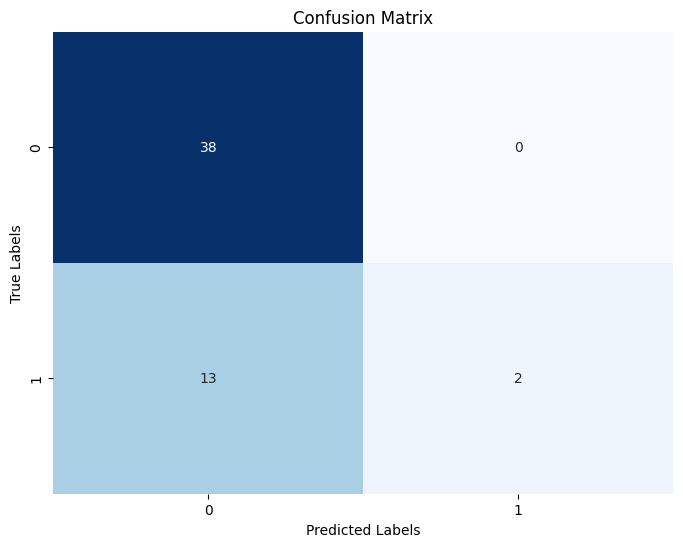

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming you have the OCR-extracted text data in a DataFrame 'df' with columns 'Image Path', 'Text Data', and 'Label'

# Data Cleaning and Preprocessing (if required)

# Feature Engineering: Using TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X = vectorizer.fit_transform(df['Text Data'])
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression classifier
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy and print it in percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




In [100]:
import joblib
joblib.dump(vectorizer, 'vectorizer.joblib')
joblib.dump(model, 'train-model.joblib')

['train-model.joblib']

In [101]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming you have the OCR-extracted text data in a DataFrame 'df' with columns 'Image Path', 'Text Data', and 'Label'

# # Data Cleaning and Preprocessing (if required)

# # Feature Engineering: Using TF-IDF Vectorization
# vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
# X = vectorizer.fit_transform(df['Text Data'])
# y = df['Label']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the XGBoost classifier
# model = xgb.XGBClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate the accuracy and print it in percentage
# accuracy = accuracy_score(y_test, y_pred) * 100
# print("Accuracy: {:.2f}%".format(accuracy))

# # Generate a classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [102]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming you have the OCR-extracted text data in a DataFrame 'df' with columns 'Image Path', 'Text Data', and 'Label'

# # Data Cleaning and Preprocessing (if required)

# # Feature Engineering: Using TF-IDF Vectorization
# vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
# X = vectorizer.fit_transform(df['Text Data'])
# y = df['Label']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the Naive Bayes classifier
# model = MultinomialNB()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate the accuracy and print it in percentage
# accuracy = accuracy_score(y_test, y_pred) * 100
# print("Accuracy: {:.2f}%".format(accuracy))

# # Generate a classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [103]:
import pandas as pd

# Assuming your CSV file is named 'dataset.csv' and located in the current working directory
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Walmart Hackathon/Dataset.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Count the occurrences of each label in the 'Label' column
label_counts = df['Label'].value_counts()

# Print the number of fraud and legitimate records
num_fraud_records = label_counts.get(0, 0)
num_legitimate_records = label_counts.get(1, 0)

print("Number of Fraud Records:", num_fraud_records)
print("Number of Legitimate Records:", num_legitimate_records)


Number of Fraud Records: 109
Number of Legitimate Records: 67
